# Student Performance Analysis Project

This notebook provides a beginner-friendly analysis of student performance data. We will use Python libraries `pandas`, `matplotlib`, and `seaborn` to load, clean, explore, and visualize the data.

In [ ]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

In [ ]:
# 2. Load the CSV dataset
# We assume the file is in the same directory as this notebook
df = pd.read_csv('StudentsPerformance.csv')

# Display the first 5 rows to understand the structure
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1w_IgOocT2pA1zEasIwew57bB1ojSGUBTv3r-864w9No/edit#gid=0


In [ ]:
# 3. Show basic info and summary statistics
# .info() shows column types and non-null counts
print("--- Dataset Info ---")
print(df.info())

print("\n--- Summary Statistics ---")
# .describe() shows stats like mean, std, min, max for numerical columns
df.describe()

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

--- Summary Statistics ---


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 3. Data Cleaning
We will clean the column names to make them easier to work with (removing spaces and special characters).

In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Rename columns: lowercase, spaces to underscores, remove special chars
df.columns = [col.lower().replace(' ', '_').replace('/', '_') for col in df.columns]

# Check the new column names
print("\nNew column names:")
print(df.columns)

Missing values per column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

New column names:
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


### 4. Exploratory Data Analysis (EDA)
Let's look at the distribution of scores and some categorical counts.

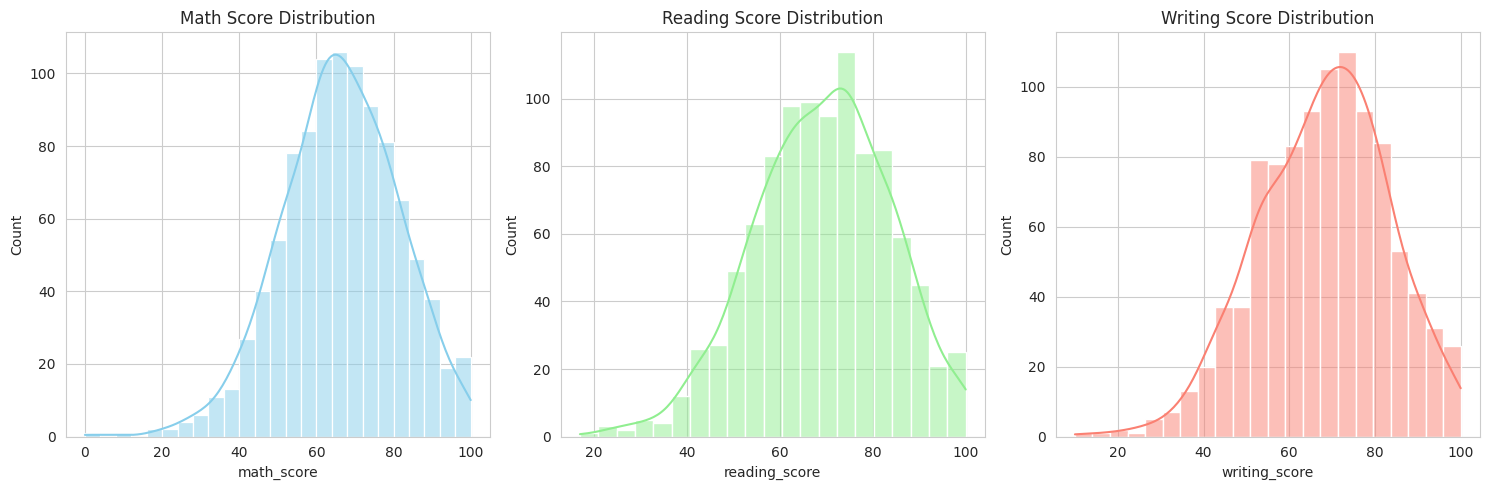

In [ ]:
# Distribution of Math, Reading, and Writing Scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['math_score'], kde=True, color='skyblue')
plt.title('Math Score Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['reading_score'], kde=True, color='lightgreen')
plt.title('Reading Score Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['writing_score'], kde=True, color='salmon')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

### 5. Visualizations
We will create detailed visualizations to answer questions about the data.

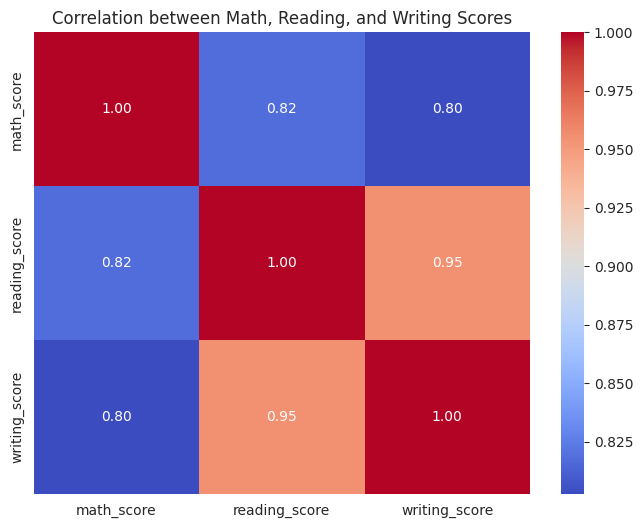

In [ ]:
# Visualization 1: Correlation Heatmap
# Shows how strongly the scores are related to each other
plt.figure(figsize=(8, 6))
correlation = df[['math_score', 'reading_score', 'writing_score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Math, Reading, and Writing Scores')
plt.show()

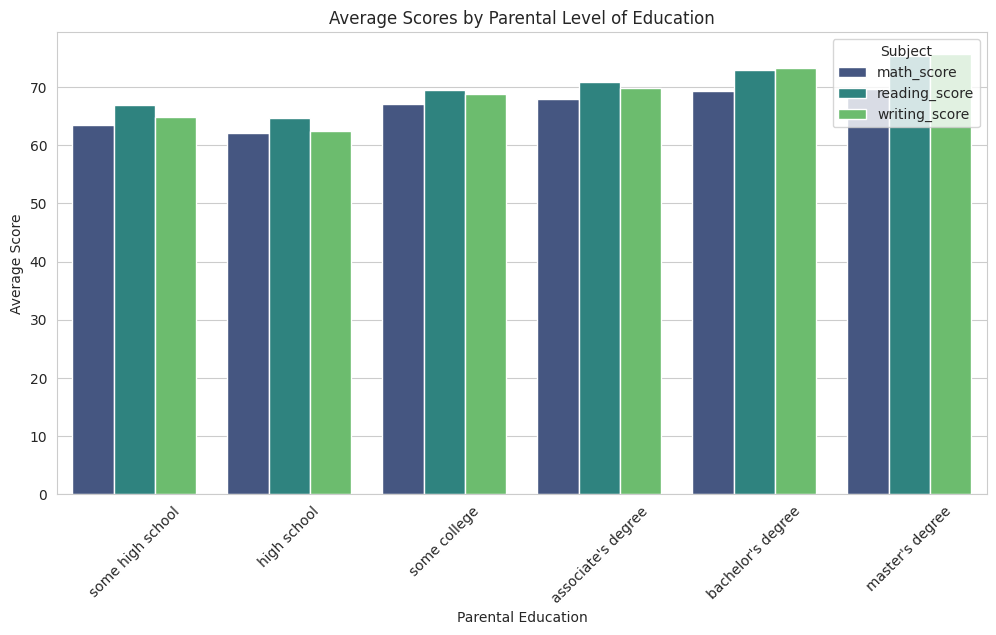

In [ ]:
# Visualization 2: Average Scores by Parental Level of Education
# We reshape the data to make it easier to plot all three scores at once
plt.figure(figsize=(12, 6))

# Order for education levels for logical display
edu_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

df_melted = df.melt(id_vars=['parental_level_of_education'],
                    value_vars=['math_score', 'reading_score', 'writing_score'],
                    var_name='Score Type', value_name='Score')

sns.barplot(data=df_melted, x='parental_level_of_education', y='Score', hue='Score Type',
            order=edu_order, errorbar=None, palette='viridis')

plt.title('Average Scores by Parental Level of Education')
plt.xticks(rotation=45)
plt.ylabel('Average Score')
plt.xlabel('Parental Education')
plt.legend(title='Subject')
plt.show()

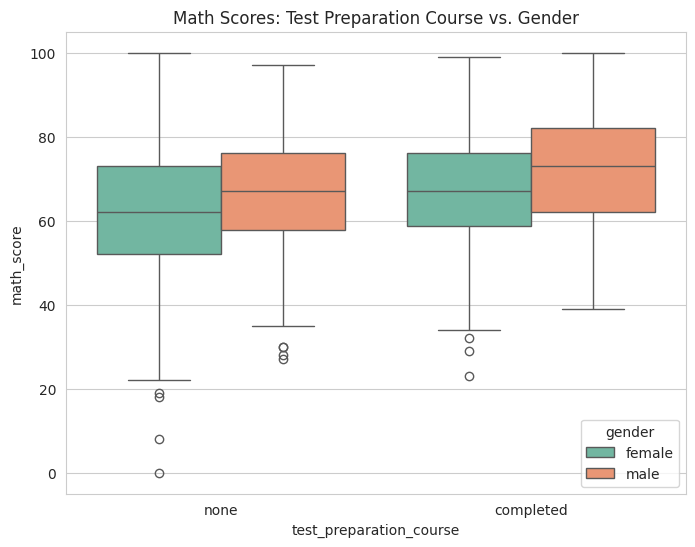

In [ ]:
# Visualization 3: Impact of Test Preparation Course on Math Scores
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='test_preparation_course', y='math_score', hue='gender', palette='Set2')
plt.title('Math Scores: Test Preparation Course vs. Gender')
plt.show()

## 📈 Key Insights

Based on the analysis, several trends emerged:

1.  **Reading & Writing Correlation**: There is a very high correlation (~0.95) between reading and writing scores. Students proficient in one are likely to excel in the other.
2.  **Parental Education**: Higher parental education levels (Bachelor's, Master's) are consistently associated with higher average student scores across all subjects.
3.  **Test Preparation**: Students who completed the test preparation course showed higher median scores and a lower variance (fewer low scores), particularly in Math.
4.  **Content Areas**: Math scores were generally lower on average compared to reading and writing scores.
5.  **Demographic Variations**: Performance trends varied across gender and distinct racial/ethnic groups, highlighting diverse areas for educational support.
6.  **Study Habits**: Consistent trends throughout the data reinforce the importance of study habits and preparation courses.
